In [1]:
#!pip install keras

In [2]:
from keras.datasets import mnist # 60000 training grey images of handwritten images of size 28*28
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

In [3]:
from sklearn.metrics import accuracy_score

In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [5]:
x_train.shape
x_test.shape

(10000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
y_train[0] #label of first image in the training dataset

5

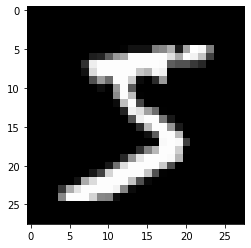

In [8]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap='gray')  #plotting the first image of the training dataset

In [9]:
#reshaping the training data
x_train = x_train.reshape(x_train.shape[0],28,28,1) # 1 denotes the number of planes
x_train.shape

(60000, 28, 28, 1)

In [10]:
#reshaping the testing data
x_test = x_test.reshape(x_test.shape[0],28,28,1)  # 1 denotes the number of planes
x_test.shape

(10000, 28, 28, 1)

In [11]:
# converting the datatype to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [12]:
# Normalizing the values
x_train = x_train/255
x_test = x_test/255

In [13]:
num_classes = 10
# Converting each label into 10 columns
y_train_one_hot = np_utils.to_categorical(y_train, num_classes)
y_test_one_hot = np_utils.to_categorical(y_test, num_classes)

y_train_one_hot.shape

(60000, 10)

In [14]:
y_train_one_hot[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [24]:
model =  Sequential()
model.add(Conv2D(25, kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [25]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [26]:
history = model.fit(x_train,y_train_one_hot, batch_size=250, epochs=10, validation_data=(x_test,y_test_one_hot))

Epoch 1/10
240/240 [==============================] - 11s 45ms/step - loss: 0.3180 - accuracy: 0.9140 - val_loss: 0.1080 - val_accuracy: 0.9693
Epoch 2/10
240/240 [==============================] - 11s 44ms/step - loss: 0.0906 - accuracy: 0.9735 - val_loss: 0.0705 - val_accuracy: 0.9773
Epoch 3/10
240/240 [==============================] - 10s 41ms/step - loss: 0.0607 - accuracy: 0.9828 - val_loss: 0.0602 - val_accuracy: 0.9810
Epoch 4/10
240/240 [==============================] - 10s 41ms/step - loss: 0.0465 - accuracy: 0.9864 - val_loss: 0.0478 - val_accuracy: 0.9837
Epoch 5/10
240/240 [==============================] - 10s 41ms/step - loss: 0.0376 - accuracy: 0.9888 - val_loss: 0.0542 - val_accuracy: 0.9826
Epoch 6/10
240/240 [==============================] - 10s 42ms/step - loss: 0.0310 - accuracy: 0.9910 - val_loss: 0.0448 - val_accuracy: 0.9851
Epoch 7/10
240/240 [==============================] - 10s 41ms/step - loss: 0.0260 - accuracy: 0.9923 - val_loss: 0.0447 - val_accuracy:

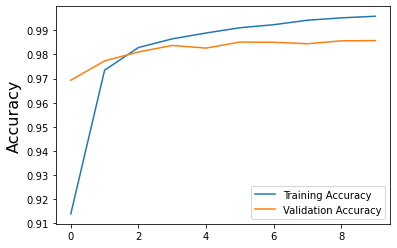

In [27]:
import matplotlib.pyplot as plt
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [28]:
model.save('mnist.h5')

In [29]:
import numpy as np
res1 = model.predict(x_train)[0]
print(np.argmax(res1))

5


In [35]:
from keras.models import load_model
from tkinter import *
import win32gui
import tkinter as tk
from PIL import ImageGrab, Image
import numpy as np

model = load_model('mnist.h5')

def predict_digit(img):
    #resize image to 28x28 pixels
    img = img.resize((28,28))
    #convert rgb to grayscale
    img = img.convert('L')
    img = np.array(img)
    #reshaping to support our model input and normalizing
    img = img.reshape(1,28,28,1)
    img = img/255.0
    #predicting the class
    res = model.predict([img])[0]
    return np.argmax(res), max(res)

class App(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)

        self.x = self.y = 0

        # Creating elements
        self.canvas = tk.Canvas(self, width=300, height=300, bg = "white", cursor="cross")
        self.label = tk.Label(self, text="Thinking..", font=("Helvetica", 48))
        self.classify_btn = tk.Button(self, text = "Recognise", command = self.classify_handwriting) 
        self.button_clear = tk.Button(self, text = "Clear", command = self.clear_all)

        # Grid structure
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)

        #self.canvas.bind("<Motion>", self.start_pos)
        self.canvas.bind("<B1-Motion>", self.draw_lines)

    def clear_all(self):
        self.canvas.delete("all")

    def classify_handwriting(self):
        HWND = self.canvas.winfo_id() # get the handle of the canvas
        rect = win32gui.GetWindowRect(HWND) # get the coordinate of the canvas
        im = ImageGrab.grab(rect)

        digit, acc = predict_digit(im)
        self.label.configure(text= str(digit)+', '+ str(int(acc*100))+'%')

    def draw_lines(self, event):
        self.x = event.x
        self.y = event.y
        r=8
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='black')

app = App()
mainloop()